<h2><center>TANK GAME</center></h2>

### =====================================================================

- **Name: Abhishek Tiwari**
- **Class: 5BScDs**
- **RegNo: 21112038**

### =====================================================================


**1. Import the modules**

In [1]:
import pygame
import time
import random

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


**2. Set the game window**

In [3]:
pygame.init()

display_width = 800
display_height = 600

gameDisplay = pygame.display.set_mode((800,600))
pygame.display.set_caption('Tank War')

icon = pygame.image.load("C:/Users/Dhairyashil/OneDrive/Desktop/car images/mbbb.png")
pygame.display.set_icon(icon)

**3. Initializing variables for the overall program need**

In [3]:
import pygame
import sys
import random

# Initialize Pygame
pygame.init()

# Initialize the font module
pygame.font.init()

# Colors
wheat = (102, 145, 61)
# ... (other color definitions)

# Font definitions
smallfont = pygame.font.SysFont("comicsansms", 25)
medfont = pygame.font.SysFont("comicsansms", 50)
largefont = pygame.font.SysFont("Yu Mincho Demibold", 85)
vsmallfont = pygame.font.SysFont("Yu Mincho Demibold", 25)

# Clock
clock = pygame.time.Clock()

# Tank geometry
tankWidth = 40
tankHeight = 20
turretWidth = 5
wheelWidth = 5
ground_height = 35

# Other parts of your code...


In [4]:
#colors
wheat = (102, 145, 61)

introcolor = (190, 169, 146)
white = (255, 255, 255)
black = (0, 0, 0)

red =(200,0,0)
light_red = (255, 0, 0)

yellow = (200, 200, 0)
light_yellow = (255, 255, 0)

green = (34, 177, 76)
light_green = (0, 255, 0)

base = (203, 203, 203)

explode1 = (255, 153, 0)
explode2 = (255, 102, 0)
explode3 = (255, 204, 0)
explode4 = (255, 204, 153)

tankupper = (0, 92, 165)
tankrect = (0, 169, 252)
tankwheels = (0, 92, 165)
tankbottom = (0, 92, 165)

barriercolor = (236,228,86)

#font
smallfont = pygame.font.SysFont("comicsansms", 25)
medfont = pygame.font.SysFont("comicsansms", 50)
largefont = pygame.font.SysFont("Yu Mincho Demibold", 85)
vsmallfont = pygame.font.SysFont("Yu Mincho Demibold", 25)

#clock
clock = pygame.time.Clock()

#tank geometry
tankWidth = 40
tankHeight = 20

turretWidth = 5
wheelWidth = 5

ground_height = 35

**4. Introduction screen**

In [5]:
def game_intro():
    intro = True

    while intro:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    intro = False
                elif event.key == pygame.K_q:
                    pygame.quit()
                    quit()
        gameDisplay.fill(black)
        message_to_screen("Welcome to Tank War!", introcolor, -100, size="large")
        message_to_screen("Shoot and destroy the enemy tank", wheat, 15)
        message_to_screen("before they destroy you.", wheat, 60)
        message_to_screen("The more enemies you destroy, the harder they get.", wheat, 110)

        button("Play", 150, 500, 100, 50, wheat, light_green, action="play",size="vsmall")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls",size="vsmall")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit",size="vsmall")

        pygame.display.update()
        clock.tick(15)

In [6]:
#main screen display message
def message_to_screen(msg, color, y_displace=0, size="small"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = (int(display_width / 2), int(display_height / 2) + y_displace)
    gameDisplay.blit(textSurf, textRect)

#to get fonts and sizes
def text_objects(text, color, size="small"):
    if size == "small":
        textSurface = smallfont.render(text, True, color)
    if size == "medium":
        textSurface = medfont.render(text, True, color)
    if size == "large":
        textSurface = largefont.render(text, True, color)
    if size == "vsmall":
        textSurface = vsmallfont.render(text, True, color)

    return textSurface, textSurface.get_rect()

#add buttons
def button(text, x, y, width, height, inactive_color, active_color, action=None,size=" "):
    cur = pygame.mouse.get_pos()
    click = pygame.mouse.get_pressed()

    if x + width > cur[0] > x and y + height > cur[1] > y:
        pygame.draw.rect(gameDisplay, active_color, (x, y, width, height))
        if click[0] == 1 and action != None:
            if action == "quit":
                pygame.quit()
                quit()

            if action == "controls":
                game_controls()

            if action == "play":
                gameLoop()

            if action == "main":
                game_intro()

    else:
        pygame.draw.rect(gameDisplay, inactive_color, (x, y, width, height))

    text_to_button(text, black, x, y, width, height)

#display text over buttons
def text_to_button(msg, color, buttonx, buttony, buttonwidth, buttonheight, size="vsmall"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = ((buttonx + (buttonwidth / 2)), buttony + (buttonheight / 2))
    gameDisplay.blit(textSurf, textRect)

**5. game_controls()**
This function will be the new window where the control information will be shown and it will also have options to play, quit and go to the main menu.

Controls will be:

- Spacebar – fire
- Up and Down arrow keys – Turret movement
- Left and Right arrow keys – Tank movement
- D – raise Power
- A– lower Power

In [7]:
def game_controls():
    gcont = True

    while gcont:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Controls", white, -100, size="large")
        message_to_screen("Fire: Spacebar", wheat, -30)
        message_to_screen("Move Turret: Up and Down arrows", wheat, 10)
        message_to_screen("Move Tank: Left and Right arrows", wheat, 50)
        message_to_screen("Press D to raise Power % AND Press A to lower Power % ", wheat, 140)
        message_to_screen("Pause: P", wheat, 90)

        button("Play", 150, 500, 100, 50, green, light_green, action="play")
        button("Main", 350, 500, 100, 50, yellow, light_yellow, action="main")
        button("Quit", 550, 500, 100, 50, red, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

**6.GameLoop()**

In [8]:
def gameLoop():
    gameExit = False
    gameOver = False
    FPS = 15

    player_health = 100
    enemy_health = 100

    barrier_width = 50

    mainTankX = display_width * 0.9
    mainTankY = display_height * 0.9
    tankMove = 0
    currentTurPos = 0
    changeTur = 0

    enemyTankX = display_width * 0.1
    enemyTankY = display_height * 0.9

    fire_power = 50
    power_change = 0

    xlocation = (display_width / 2) + random.randint(-0.1 * display_width, 0.1 * display_width)
    randomHeight = random.randrange(display_height * 0.1, display_height * 0.6)

    while not gameExit:

        if gameOver == True:
            message_to_screen("Game Over", red, -50, size="large")
            message_to_screen("Press C to play again or Q to exit", black, 50)
            pygame.display.update()
            while gameOver == True:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        gameExit = True
                        gameOver = False

                    if event.type == pygame.KEYDOWN:
                        if event.key == pygame.K_c:
                            gameLoop()
                        elif event.key == pygame.K_q:
                            gameExit = True
                            gameOver = False

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                gameExit = True

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    tankMove = -5

                elif event.key == pygame.K_RIGHT:
                    tankMove = 5

                elif event.key == pygame.K_UP:
                    changeTur = 1

                elif event.key == pygame.K_DOWN:
                    changeTur = -1

                elif event.key == pygame.K_p:
                    pause()

                elif event.key == pygame.K_SPACE:

                    damage = fireShell(gun, mainTankX, mainTankY, currentTurPos, fire_power, xlocation, barrier_width,
                                       randomHeight, enemyTankX, enemyTankY)
                    enemy_health -= damage

                    possibleMovement = ['f', 'r']
                    moveIndex = random.randrange(0, 2)

                    for x in range(random.randrange(0, 10)):

                        if display_width * 0.3 > enemyTankX > display_width * 0.03:
                            if possibleMovement[moveIndex] == "f":
                                enemyTankX += 5
                            elif possibleMovement[moveIndex] == "r":
                                enemyTankX -= 5

                            gameDisplay.fill(black)
                            health_bars(player_health, enemy_health)
                            gun = tank(mainTankX, mainTankY, currentTurPos)
                            enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)
                            fire_power += power_change

                            power(fire_power)

                            barrier(xlocation, randomHeight, barrier_width)
                            gameDisplay.fill(base,
                                             rect=[0, display_height - ground_height, display_width, ground_height])
                            pygame.display.update()

                            clock.tick(FPS)

                    damage = e_fireShell(enemy_gun, enemyTankX, enemyTankY, 8, 50, xlocation, barrier_width,
                                         randomHeight, mainTankX, mainTankY)
                    player_health -= damage

                elif event.key == pygame.K_a:
                    power_change = -1
                elif event.key == pygame.K_d:
                    power_change = 1

            elif event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    tankMove = 0

                if event.key == pygame.K_UP or event.key == pygame.K_DOWN:
                    changeTur = 0

                if event.key == pygame.K_a or event.key == pygame.K_d:
                    power_change = 0

        mainTankX += tankMove

        currentTurPos += changeTur

        if currentTurPos > 8:
            currentTurPos = 8
        elif currentTurPos < 0:
            currentTurPos = 0

        if mainTankX - (tankWidth / 2) < xlocation + barrier_width:
            mainTankX += 5

        gameDisplay.fill(black)
        health_bars(player_health, enemy_health)
        gun = tank(mainTankX, mainTankY, currentTurPos)
        enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)

        fire_power += power_change

        if fire_power > 100:
            fire_power = 100
        elif fire_power < 1:
            fire_power = 1

        power(fire_power)

        barrier(xlocation, randomHeight, barrier_width)
        gameDisplay.fill(base, rect=[0, display_height - ground_height, display_width, ground_height])
        pygame.display.update()

        if player_health < 1:
            game_over()
        elif enemy_health < 1:
            you_win()
        clock.tick(FPS)

    pygame.quit()
    quit()

**7. pause()**

In [9]:
def pause():
    paused = True
    message_to_screen("Paused", introcolor, -100, size="large")
    message_to_screen("Press C to continue playing or Q to quit", wheat, 25)
    pygame.display.update()
    while paused:
        for event in pygame.event.get():

            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    paused = False
                elif event.key == pygame.K_q:
                    pygame.quit()
                    quit()

        clock.tick(5)

**8. fireshell()**

In [10]:
def fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, enemyTankX, enemyTankY):
    fire = True
    damage = 0
    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] -= (12 - turPos) * 2

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:
            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)

            if enemyTankX + 10 > hit_x > enemyTankX - 10:
                damage = 25
            elif enemyTankX + 15 > hit_x > enemyTankX - 15:
                damage = 18
            elif enemyTankX + 25 > hit_x > enemyTankX - 25:
                damage = 10
            elif enemyTankX + 35 > hit_x > enemyTankX - 35:
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])
            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

**9. e_fireshell()**

In [11]:
def e_fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, ptankx, ptanky):
    damage = 0
    currentPower = 1
    power_found = False

    while not power_found:
        currentPower += 1
        if currentPower > 100:
            power_found = True

        fire = True
        startingShell = list(xy)

        while fire:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            startingShell[0] += (12 - turPos) * 2
            startingShell[1] += int(
                (((startingShell[0] - xy[0]) * 0.015 / (currentPower / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

            if startingShell[1] > display_height - ground_height:
                hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
                hit_y = int(display_height - ground_height)
                if ptankx + 15 > hit_x > ptankx - 15:

                    power_found = True
                fire = False

            check_x_1 = startingShell[0] <= xlocation + barrier_width
            check_x_2 = startingShell[0] >= xlocation

            check_y_1 = startingShell[1] <= display_height
            check_y_2 = startingShell[1] >= display_height - randomHeight

            if check_x_1 and check_x_2 and check_y_1 and check_y_2:
                hit_x = int((startingShell[0]))
                hit_y = int(startingShell[1])
                fire = False

    fire = True
    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] += (12 - turPos) * 2

        gun_power = random.randrange(int(currentPower * 0.90), int(currentPower * 1.10))

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:

            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)
        
            if ptankx + 10 > hit_x > ptankx - 10:

                damage = 25
            elif ptankx + 15 > hit_x > ptankx - 15
                damage = 18
            elif ptankx + 25 > hit_x > ptankx - 25:
                damage = 10
            elif ptankx + 35 > hit_x > ptankx - 35
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])

            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

SyntaxError: invalid syntax (<ipython-input-11-ec0f87189794>, line 68)

**10. explosion()**

In [ ]:
def explosion(x, y, size=50):
    explode = True

    while explode:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        startPoint = x, y
        colorChoices = [explode1, explode2, explode3, explode4]

        magnitude = 1

        while magnitude < size:
            exploding_bit_x = x + random.randrange(-1 * magnitude, magnitude)
            exploding_bit_y = y + random.randrange(-1 * magnitude, magnitude)

            pygame.draw.circle(gameDisplay, colorChoices[random.randrange(0, 4)], (exploding_bit_x, exploding_bit_y),
                               random.randrange(1, 5))
            magnitude += 1

            pygame.display.update()
            clock.tick(100)

        explode = False

**11. health_bars()**

In [ ]:
def health_bars(player_health, enemy_health):
    if player_health > 75:
        player_health_color = green
    elif player_health > 50:
        player_health_color = yellow
    else:
        player_health_color = red

    if enemy_health > 75:
        enemy_health_color = green
    elif enemy_health > 50:
        enemy_health_color = yellow
    else:
        enemy_health_color = red

    pygame.draw.rect(gameDisplay, player_health_color, (680, 25, player_health, 25))
    pygame.draw.rect(gameDisplay, enemy_health_color, (20, 25, enemy_health, 25))

**12. tank()**

In [ ]:
def tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x - 27, y - 2),
                       (x - 26, y - 5),
                       (x - 25, y - 8),
                       (x - 23, y - 12),
                       (x - 20, y - 14),
                       (x - 18, y - 15),
                       (x - 15, y - 17),
                       (x - 13, y - 19),
                       (x - 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

**13. enemy_tank()**

In [ ]:
def enemy_tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x + 27, y - 2),
                       (x + 26, y - 5),
                       (x + 25, y - 8),
                       (x + 23, y - 12),
                       (x + 20, y - 14),
                       (x + 18, y - 15),
                       (x + 15, y - 17),
                       (x + 13, y - 19),
                       (x + 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

**14. power()**

In [ ]:
def power(level):
    text = smallfont.render("Power: " + str(level) + "%", True, wheat)
    gameDisplay.blit(text, [display_width / 2, 0])

**barrier():** 

In [ ]:
def barrier(xlocation, randomHeight, barrier_width):
    pygame.draw.rect(gameDisplay, barriercolor, [xlocation, display_height - randomHeight, barrier_width, randomHeight])

**15. game_over()**

In [ ]:
def game_over():
    game_over = True

    while game_over:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Game Over", white, -100, size="large")
        message_to_screen("You died.", wheat, -30)

        button("Play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

**16. you_win()**

In [ ]:
def you_win():
    win = True

    while win:
        for event in pygame.event.get():
            # print(event)
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("You won!", white, -100, size="large")
        message_to_screen("Congratulations!", wheat, -30)

        button("play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()
        clock.tick(15)

**17. Functions to start the game**

In [ ]:
game_intro()
gameLoop()

# Final Code:

In [2]:
from PIL import Image
import pygame

pygame.init()

display_width = 800
display_height = 600

gameDisplay = pygame.display.set_mode((800, 600))
pygame.display.set_caption('Tank War')

# Load the background image (WEBP or GIF)
try:
    background_image = Image.open("C:/Users/hp1/Downloads/rover.jpg")
    background_image = background_image.convert("RGBA")
except:
    # Handle image loading error
    print("Failed to load the image")

# Convert the image to a format that pygame can use
background_image = pygame.image.fromstring(background_image.tobytes(), background_image.size, background_image.mode)

# Set the icon
icon = pygame.image.load("C:/Users/hp1/Downloads/rover.jpg")
pygame.display.set_icon(icon)

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Blit the background image onto the display
    gameDisplay.blit(background_image, (0, 0))

    # Your game logic and other drawing code can go here

    pygame.display.update()

    
    
    

wheat = (102, 145, 61)

introcolor = (190, 169, 146)
white = (255, 255, 255)
black = (0, 0, 0)


red =(200,0,0)
light_red = (255, 0, 0)

yellow = (200, 200, 0)
light_yellow = (255, 255, 0)

green = (34, 177, 76)
light_green = (0, 255, 0)

base = (203, 203, 203)

explode1 = (255, 153, 0)
explode2 = (255, 102, 0)
explode3 = (255, 204, 0)
explode4 = (255, 204, 153)

tankupper = (0, 92, 165)
tankrect = (0, 169, 252)
tankwheels = (0, 92, 165)
tankbottom = (0, 92, 165)

barriercolor = (236,228,86)

clock = pygame.time.Clock()

tankWidth = 40
tankHeight = 20

turretWidth = 5
wheelWidth = 5

ground_height = 35

smallfont = pygame.font.SysFont("comicsansms", 25)
medfont = pygame.font.SysFont("comicsansms", 50)
largefont = pygame.font.SysFont("Yu Mincho Demibold", 85)
vsmallfont = pygame.font.SysFont("Yu Mincho Demibold", 25)

def text_objects(text, color, size="small"):
    if size == "small":
        textSurface = smallfont.render(text, True, color)
    if size == "medium":
        textSurface = medfont.render(text, True, color)
    if size == "large":
        textSurface = largefont.render(text, True, color)
    if size == "vsmall":
        textSurface = vsmallfont.render(text, True, color)

    return textSurface, textSurface.get_rect()


def message_to_screen(msg, color, y_displace=0, size="small"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = (int(display_width / 2), int(display_height / 2) + y_displace)
    gameDisplay.blit(textSurf, textRect)

def text_to_button(msg, color, buttonx, buttony, buttonwidth, buttonheight, size="vsmall"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = ((buttonx + (buttonwidth / 2)), buttony + (buttonheight / 2))
    gameDisplay.blit(textSurf, textRect)

def game_controls():
    gcont = True

    while gcont:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Controls", white, -100, size="large")
        message_to_screen("Fire: Spacebar", wheat, -30)
        message_to_screen("Move Turret: Up and Down arrows", wheat, 10)
        message_to_screen("Move Tank: Left and Right arrows", wheat, 50)
        message_to_screen("Press D to raise Power % AND Press A to lower Power % ", wheat, 140)
        message_to_screen("Pause: P", wheat, 90)

        button("Play", 150, 500, 100, 50, green, light_green, action="play")
        button("Main", 350, 500, 100, 50, yellow, light_yellow, action="main")
        button("Quit", 550, 500, 100, 50, red, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def pause():
    paused = True
    message_to_screen("Paused", introcolor, -100, size="large")
    message_to_screen("Press C to continue playing or Q to quit", wheat, 25)
    pygame.display.update()
    while paused:
        for event in pygame.event.get():

            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    paused = False
                elif event.key == pygame.K_q:
                    pygame.quit()
                    quit()

        clock.tick(5)

def fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, enemyTankX, enemyTankY):
    fire = True
    damage = 0

    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] -= (12 - turPos) * 2

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:
            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)

            if enemyTankX + 10 > hit_x > enemyTankX - 10:
                damage = 25
            elif enemyTankX + 15 > hit_x > enemyTankX - 15:
                damage = 18
            elif enemyTankX + 25 > hit_x > enemyTankX - 25:
                damage = 10
            elif enemyTankX + 35 > hit_x > enemyTankX - 35:
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])
            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

def e_fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, ptankx, ptanky):
    damage = 0
    currentPower = 1
    power_found = False

    while not power_found:
        currentPower += 1
        if currentPower > 100:
            power_found = True

        fire = True
        startingShell = list(xy)

        while fire:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            startingShell[0] += (12 - turPos) * 2
            startingShell[1] += int(
                (((startingShell[0] - xy[0]) * 0.015 / (currentPower / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

            if startingShell[1] > display_height - ground_height:
                hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
                hit_y = int(display_height - ground_height)
                if ptankx + 15 > hit_x > ptankx - 15:
                    power_found = True
                fire = False

            check_x_1 = startingShell[0] <= xlocation + barrier_width
            check_x_2 = startingShell[0] >= xlocation

            check_y_1 = startingShell[1] <= display_height
            check_y_2 = startingShell[1] >= display_height - randomHeight

            if check_x_1 and check_x_2 and check_y_1 and check_y_2:
                hit_x = int((startingShell[0]))
                hit_y = int(startingShell[1])
                fire = False

    fire = True
    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] += (12 - turPos) * 2

        gun_power = random.randrange(int(currentPower * 0.90), int(currentPower * 1.10))

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:
            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)
         

            if ptankx + 10 > hit_x > ptankx - 10:
                damage = 25
            elif ptankx + 15 > hit_x > ptankx - 15:
                damage = 18
            elif ptankx + 25 > hit_x > ptankx - 25:
                damage = 10
            elif ptankx + 35 > hit_x > ptankx - 35:
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])
            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

def explosion(x, y, size=50):
    explode = True

    while explode:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        startPoint = x, y

        colorChoices = [explode1, explode2, explode3, explode4]

        magnitude = 1

        while magnitude < size:
            exploding_bit_x = x + random.randrange(-1 * magnitude, magnitude)
            exploding_bit_y = y + random.randrange(-1 * magnitude, magnitude)

            pygame.draw.circle(gameDisplay, colorChoices[random.randrange(0, 4)], (exploding_bit_x, exploding_bit_y),
                               random.randrange(1, 5))
            magnitude += 1

            pygame.display.update()
            clock.tick(100)

        explode = False

def health_bars(player_health, enemy_health):
    if player_health > 75:
        player_health_color = green
    elif player_health > 50:
        player_health_color = yellow
    else:
        player_health_color = red

    if enemy_health > 75:
        enemy_health_color = green
    elif enemy_health > 50:
        enemy_health_color = yellow
    else:
        enemy_health_color = red

    pygame.draw.rect(gameDisplay, player_health_color, (680, 25, player_health, 25))
    pygame.draw.rect(gameDisplay, enemy_health_color, (20, 25, enemy_health, 25))

def tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x - 27, y - 2),
                       (x - 26, y - 5),
                       (x - 25, y - 8),
                       (x - 23, y - 12),
                       (x - 20, y - 14),
                       (x - 18, y - 15),
                       (x - 15, y - 17),
                       (x - 13, y - 19),
                       (x - 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

def enemy_tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x + 27, y - 2),
                       (x + 26, y - 5),
                       (x + 25, y - 8),
                       (x + 23, y - 12),
                       (x + 20, y - 14),
                       (x + 18, y - 15),
                       (x + 15, y - 17),
                       (x + 13, y - 19),
                       (x + 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

def power(level):
    text = smallfont.render("Power: " + str(level) + "%", True, wheat)
    gameDisplay.blit(text, [display_width / 2, 0])

def barrier(xlocation, randomHeight, barrier_width):
    pygame.draw.rect(gameDisplay, barriercolor, [xlocation, display_height - randomHeight, barrier_width, randomHeight])

def game_over():
    game_over = True

    while game_over:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Game Over", white, -100, size="large")
        message_to_screen("You died.", wheat, -30)

        button("Play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def you_win():
    win = True

    while win:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("You won!", white, -100, size="large")
        message_to_screen("Congratulations!", wheat, -30)

        button("play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def gameLoop():
    gameExit = False
    gameOver = False
    FPS = 15

    player_health = 100
    enemy_health = 100

    barrier_width = 50

    mainTankX = display_width * 0.9
    mainTankY = display_height * 0.9
    tankMove = 0
    currentTurPos = 0
    changeTur = 0

    enemyTankX = display_width * 0.1
    enemyTankY = display_height * 0.9

    fire_power = 50
    power_change = 0

    xlocation = (display_width / 2) + random.randint(-0.1 * display_width, 0.1 * display_width)
    randomHeight = random.randrange(display_height * 0.1, display_height * 0.6)

    while not gameExit:

        if gameOver == True:
            message_to_screen("Game Over", red, -50, size="large")
            message_to_screen("Press C to play again or Q to exit", black, 50)
            pygame.display.update()
            while gameOver == True:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        gameExit = True
                        gameOver = False

                    if event.type == pygame.KEYDOWN:
                        if event.key == pygame.K_c:
                            gameLoop()
                        elif event.key == pygame.K_q:

                            gameExit = True
                            gameOver = False

        for event in pygame.event.get():

            if event.type == pygame.QUIT:
                gameExit = True

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    tankMove = -5

                elif event.key == pygame.K_RIGHT:
                    tankMove = 5

                elif event.key == pygame.K_UP:
                    changeTur = 1

                elif event.key == pygame.K_DOWN:
                    changeTur = -1

                elif event.key == pygame.K_p:
                    pause()

                elif event.key == pygame.K_SPACE:

                    damage = fireShell(gun, mainTankX, mainTankY, currentTurPos, fire_power, xlocation, barrier_width,
                                       randomHeight, enemyTankX, enemyTankY)
                    enemy_health -= damage

                    possibleMovement = ['f', 'r']
                    moveIndex = random.randrange(0, 2)

                    for x in range(random.randrange(0, 10)):

                        if display_width * 0.3 > enemyTankX > display_width * 0.03:
                            if possibleMovement[moveIndex] == "f":
                                enemyTankX += 5
                            elif possibleMovement[moveIndex] == "r":
                                enemyTankX -= 5

                            gameDisplay.fill(black)
                            health_bars(player_health, enemy_health)
                            gun = tank(mainTankX, mainTankY, currentTurPos)
                            enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)
                            fire_power += power_change

                            power(fire_power)

                            barrier(xlocation, randomHeight, barrier_width)
                            gameDisplay.fill(base,
                                             rect=[0, display_height - ground_height, display_width, ground_height])
                            pygame.display.update()

                            clock.tick(FPS)

                    damage = e_fireShell(enemy_gun, enemyTankX, enemyTankY, 8, 50, xlocation, barrier_width,
                                         randomHeight, mainTankX, mainTankY)
                    player_health -= damage

                elif event.key == pygame.K_a:
                    power_change = -1
                elif event.key == pygame.K_d:
                    power_change = 1

            elif event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    tankMove = 0

                if event.key == pygame.K_UP or event.key == pygame.K_DOWN:
                    changeTur = 0

                if event.key == pygame.K_a or event.key == pygame.K_d:
                    power_change = 0

        mainTankX += tankMove

        currentTurPos += changeTur

        if currentTurPos > 8:
            currentTurPos = 8
        elif currentTurPos < 0:
            currentTurPos = 0

        if mainTankX - (tankWidth / 2) < xlocation + barrier_width:
            mainTankX += 5

        gameDisplay.fill(black)
        health_bars(player_health, enemy_health)
        gun = tank(mainTankX, mainTankY, currentTurPos)
        enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)

        fire_power += power_change

        if fire_power > 100:
            fire_power = 100
        elif fire_power < 1:
            fire_power = 1

        power(fire_power)

        barrier(xlocation, randomHeight, barrier_width)
        gameDisplay.fill(base, rect=[0, display_height - ground_height, display_width, ground_height])
        pygame.display.update()

        if player_health < 1:
            game_over()
        elif enemy_health < 1:
            you_win()
        clock.tick(FPS)

    pygame.quit()
    quit()



def button(text, x, y, width, height, inactive_color, active_color, action=None,size=" "):
    cur = pygame.mouse.get_pos()
    click = pygame.mouse.get_pressed()
    # print(click)
    if x + width > cur[0] > x and y + height > cur[1] > y:
        pygame.draw.rect(gameDisplay, active_color, (x, y, width, height))
        if click[0] == 1 and action != None:
            if action == "quit":
                pygame.quit()
                quit()

            if action == "controls":
                game_controls()

            if action == "play":
                gameLoop()

            if action == "main":
                game_intro()

    else:
        pygame.draw.rect(gameDisplay, inactive_color, (x, y, width, height))

    text_to_button(text, black, x, y, width, height)


def game_intro():
    intro = True

    while intro:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    intro = False
                elif event.key == pygame.K_q:

                    pygame.quit()
                    quit()
        gameDisplay.fill(black)
        message_to_screen("Welcome to Tank War!", introcolor, -100, size="large")
        message_to_screen("Shoot and destroy the enemy tank", wheat, 15)
        message_to_screen("before they destroy you.", wheat, 60)
        message_to_screen("The more enemies you destroy, the harder they get.", wheat, 110)
        

        button("Play", 150, 500, 100, 50, wheat, light_green, action="play",size="vsmall")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls",size="vsmall")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit",size="vsmall")

        pygame.display.update()
        clock.tick(15)

game_intro()
gameLoop()

C:\Users\hp1\AppData\Local\Temp\ipykernel_14704\4236052538.py:484: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  randomHeight = random.randrange(display_height * 0.1, display_height * 0.6)


error: Library not initialized

**Output**

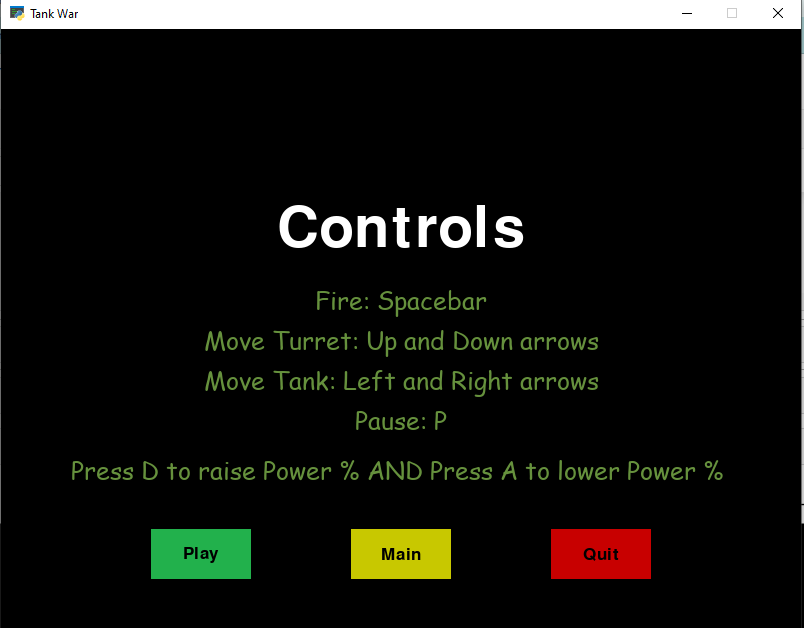

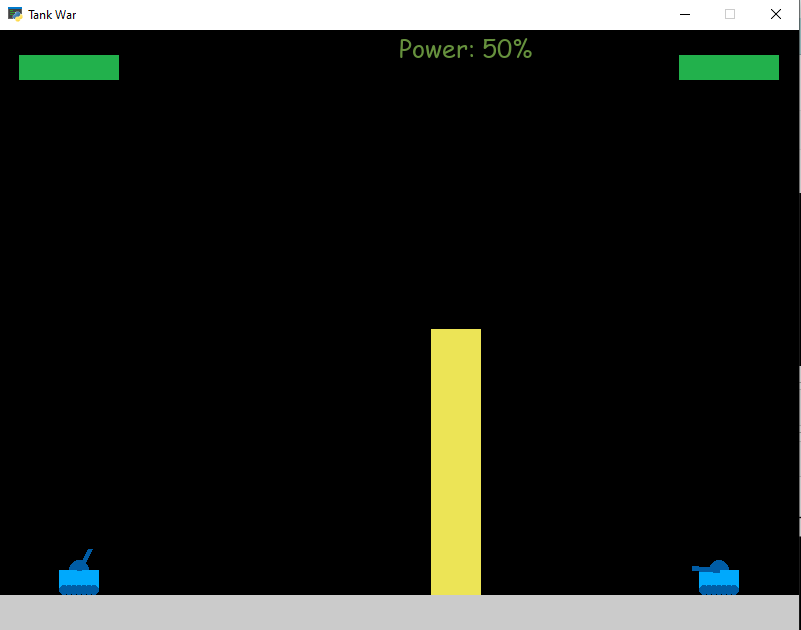

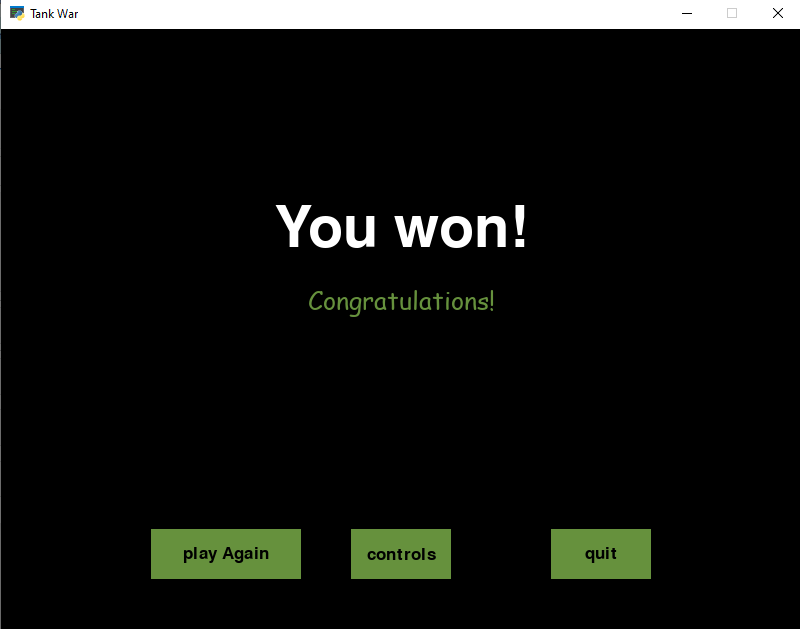

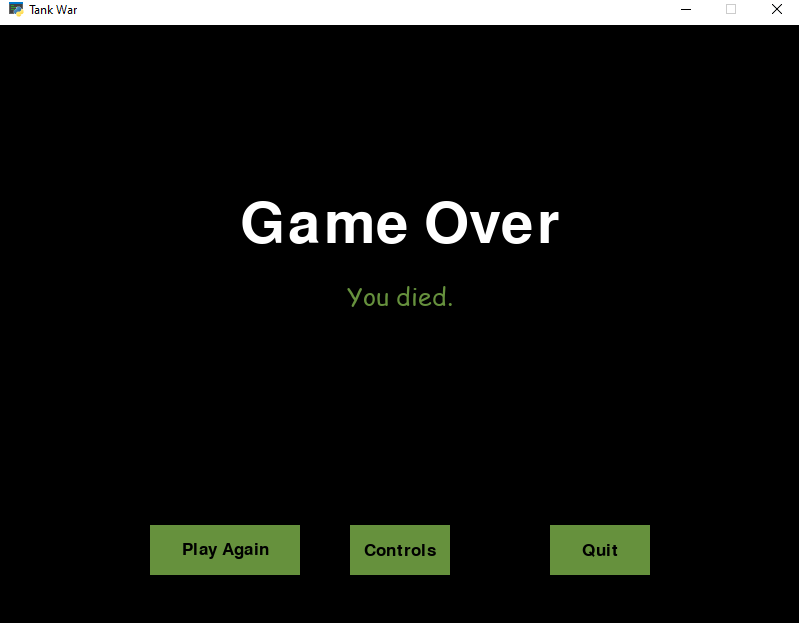

In [1]:
from PIL import Image
import pygame
import pygame.mixer
# ... (previous code)

pygame.init()
pygame.mixer.init()

# Load background music
background_music = pygame.mixer.Sound("C:/Users/hp1/Downloads/Jaguar Bohemia Sukhe Ringtone.mp3")

display_width = 800
display_height = 600

gameDisplay = pygame.display.set_mode((800, 600))
pygame.display.set_caption('Tank War')

# Play background music
background_music.play(-1)

# ... (rest of the code)

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # ... (rest of the game loop)

    pygame.display.update()
    
wheat = (102, 145, 61)

introcolor = (190, 169, 146)
white = (255, 255, 255)
black = (0, 0, 0)


red =(200,0,0)
light_red = (255, 0, 0)

yellow = (200, 200, 0)
light_yellow = (255, 255, 0)

green = (34, 177, 76)
light_green = (0, 255, 0)

base = (203, 203, 203)

explode1 = (255, 153, 0)
explode2 = (255, 102, 0)
explode3 = (255, 204, 0)
explode4 = (255, 204, 153)

tankupper = (0, 92, 165)
tankrect = (0, 169, 252)
tankwheels = (0, 92, 165)
tankbottom = (0, 92, 165)

barriercolor = (236,228,86)

clock = pygame.time.Clock()

tankWidth = 40
tankHeight = 20

turretWidth = 5
wheelWidth = 5

ground_height = 35

smallfont = pygame.font.SysFont("comicsansms", 25)
medfont = pygame.font.SysFont("comicsansms", 50)
largefont = pygame.font.SysFont("Yu Mincho Demibold", 85)
vsmallfont = pygame.font.SysFont("Yu Mincho Demibold", 25)

def text_objects(text, color, size="small"):
    if size == "small":
        textSurface = smallfont.render(text, True, color)
    if size == "medium":
        textSurface = medfont.render(text, True, color)
    if size == "large":
        textSurface = largefont.render(text, True, color)
    if size == "vsmall":
        textSurface = vsmallfont.render(text, True, color)

    return textSurface, textSurface.get_rect()


def message_to_screen(msg, color, y_displace=0, size="small"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = (int(display_width / 2), int(display_height / 2) + y_displace)
    gameDisplay.blit(textSurf, textRect)

def text_to_button(msg, color, buttonx, buttony, buttonwidth, buttonheight, size="vsmall"):
    textSurf, textRect = text_objects(msg, color, size)
    textRect.center = ((buttonx + (buttonwidth / 2)), buttony + (buttonheight / 2))
    gameDisplay.blit(textSurf, textRect)

def game_controls():
    gcont = True

    while gcont:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Controls", white, -100, size="large")
        message_to_screen("Fire: Spacebar", wheat, -30)
        message_to_screen("Move Turret: Up and Down arrows", wheat, 10)
        message_to_screen("Move Tank: Left and Right arrows", wheat, 50)
        message_to_screen("Press D to raise Power % AND Press A to lower Power % ", wheat, 140)
        message_to_screen("Pause: P", wheat, 90)

        button("Play", 150, 500, 100, 50, green, light_green, action="play")
        button("Main", 350, 500, 100, 50, yellow, light_yellow, action="main")
        button("Quit", 550, 500, 100, 50, red, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def pause():
    paused = True
    message_to_screen("Paused", introcolor, -100, size="large")
    message_to_screen("Press C to continue playing or Q to quit", wheat, 25)
    pygame.display.update()
    while paused:
        for event in pygame.event.get():

            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    paused = False
                elif event.key == pygame.K_q:
                    pygame.quit()
                    quit()

        clock.tick(5)

def fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, enemyTankX, enemyTankY):
    fire = True
    damage = 0

    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] -= (12 - turPos) * 2

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:
            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)

            if enemyTankX + 10 > hit_x > enemyTankX - 10:
                damage = 25
            elif enemyTankX + 15 > hit_x > enemyTankX - 15:
                damage = 18
            elif enemyTankX + 25 > hit_x > enemyTankX - 25:
                damage = 10
            elif enemyTankX + 35 > hit_x > enemyTankX - 35:
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])
            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

def e_fireShell(xy, tankx, tanky, turPos, gun_power, xlocation, barrier_width, randomHeight, ptankx, ptanky):
    damage = 0
    currentPower = 1
    power_found = False

    while not power_found:
        currentPower += 1
        if currentPower > 100:
            power_found = True

        fire = True
        startingShell = list(xy)

        while fire:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            startingShell[0] += (12 - turPos) * 2
            startingShell[1] += int(
                (((startingShell[0] - xy[0]) * 0.015 / (currentPower / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

            if startingShell[1] > display_height - ground_height:
                hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
                hit_y = int(display_height - ground_height)
                if ptankx + 15 > hit_x > ptankx - 15:
                    power_found = True
                fire = False

            check_x_1 = startingShell[0] <= xlocation + barrier_width
            check_x_2 = startingShell[0] >= xlocation

            check_y_1 = startingShell[1] <= display_height
            check_y_2 = startingShell[1] >= display_height - randomHeight

            if check_x_1 and check_x_2 and check_y_1 and check_y_2:
                hit_x = int((startingShell[0]))
                hit_y = int(startingShell[1])
                fire = False

    fire = True
    startingShell = list(xy)

    while fire:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
        pygame.draw.circle(gameDisplay, explode1, (startingShell[0], startingShell[1]), 5)

        startingShell[0] += (12 - turPos) * 2

        gun_power = random.randrange(int(currentPower * 0.90), int(currentPower * 1.10))

        startingShell[1] += int(
            (((startingShell[0] - xy[0]) * 0.015 / (gun_power / 50)) ** 2) - (turPos + turPos / (12 - turPos)))

        if startingShell[1] > display_height - ground_height:
            hit_x = int((startingShell[0] * display_height - ground_height) / startingShell[1])
            hit_y = int(display_height - ground_height)
         

            if ptankx + 10 > hit_x > ptankx - 10:
                damage = 25
            elif ptankx + 15 > hit_x > ptankx - 15:
                damage = 18
            elif ptankx + 25 > hit_x > ptankx - 25:
                damage = 10
            elif ptankx + 35 > hit_x > ptankx - 35:
                damage = 5

            explosion(hit_x, hit_y)
            fire = False

        check_x_1 = startingShell[0] <= xlocation + barrier_width
        check_x_2 = startingShell[0] >= xlocation

        check_y_1 = startingShell[1] <= display_height
        check_y_2 = startingShell[1] >= display_height - randomHeight

        if check_x_1 and check_x_2 and check_y_1 and check_y_2:
            hit_x = int((startingShell[0]))
            hit_y = int(startingShell[1])
            explosion(hit_x, hit_y)
            fire = False

        pygame.display.update()
        clock.tick(60)
    return damage

def explosion(x, y, size=50):
    explode = True

    while explode:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        startPoint = x, y

        colorChoices = [explode1, explode2, explode3, explode4]

        magnitude = 1

        while magnitude < size:
            exploding_bit_x = x + random.randrange(-1 * magnitude, magnitude)
            exploding_bit_y = y + random.randrange(-1 * magnitude, magnitude)

            pygame.draw.circle(gameDisplay, colorChoices[random.randrange(0, 4)], (exploding_bit_x, exploding_bit_y),
                               random.randrange(1, 5))
            magnitude += 1

            pygame.display.update()
            clock.tick(100)

        explode = False

def health_bars(player_health, enemy_health):
    if player_health > 75:
        player_health_color = green
    elif player_health > 50:
        player_health_color = yellow
    else:
        player_health_color = red

    if enemy_health > 75:
        enemy_health_color = green
    elif enemy_health > 50:
        enemy_health_color = yellow
    else:
        enemy_health_color = red

    pygame.draw.rect(gameDisplay, player_health_color, (680, 25, player_health, 25))
    pygame.draw.rect(gameDisplay, enemy_health_color, (20, 25, enemy_health, 25))

def tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x - 27, y - 2),
                       (x - 26, y - 5),
                       (x - 25, y - 8),
                       (x - 23, y - 12),
                       (x - 20, y - 14),
                       (x - 18, y - 15),
                       (x - 15, y - 17),
                       (x - 13, y - 19),
                       (x - 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

def enemy_tank(x, y, turPos):
    x = int(x)
    y = int(y)

    possibleTurrets = [(x + 27, y - 2),
                       (x + 26, y - 5),
                       (x + 25, y - 8),
                       (x + 23, y - 12),
                       (x + 20, y - 14),
                       (x + 18, y - 15),
                       (x + 15, y - 17),
                       (x + 13, y - 19),
                       (x + 11, y - 21)
                       ]

    pygame.draw.circle(gameDisplay, tankupper, (x, y), int(tankHeight / 2))
    pygame.draw.rect(gameDisplay, tankrect, (x - tankHeight, y, tankWidth, tankHeight))

    pygame.draw.line(gameDisplay, tankupper, (x, y), possibleTurrets[turPos], turretWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)

    pygame.draw.circle(gameDisplay, tankbottom, (x - 15, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x - 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 5, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 10, y + 20), wheelWidth)
    pygame.draw.circle(gameDisplay, tankbottom, (x + 15, y + 20), wheelWidth)

    return possibleTurrets[turPos]

def power(level):
    text = smallfont.render("Power: " + str(level) + "%", True, wheat)
    gameDisplay.blit(text, [display_width / 2, 0])

def barrier(xlocation, randomHeight, barrier_width):
    pygame.draw.rect(gameDisplay, barriercolor, [xlocation, display_height - randomHeight, barrier_width, randomHeight])

def game_over():
    game_over = True

    while game_over:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("Game Over", white, -100, size="large")
        message_to_screen("You died.", wheat, -30)

        button("Play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def you_win():
    win = True

    while win:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        gameDisplay.fill(black)
        message_to_screen("You won!", white, -100, size="large")
        message_to_screen("Congratulations!", wheat, -30)

        button("play Again", 150, 500, 150, 50, wheat, light_green, action="play")
        button("controls", 350, 500, 100, 50, wheat, light_yellow, action="controls")
        button("quit", 550, 500, 100, 50, wheat, light_red, action="quit")

        pygame.display.update()

        clock.tick(15)

def gameLoop():
    gameExit = False
    gameOver = False
    FPS = 15

    player_health = 100
    enemy_health = 100

    barrier_width = 50

    mainTankX = display_width * 0.9
    mainTankY = display_height * 0.9
    tankMove = 0
    currentTurPos = 0
    changeTur = 0

    enemyTankX = display_width * 0.1
    enemyTankY = display_height * 0.9

    fire_power = 50
    power_change = 0

    xlocation = (display_width / 2) + random.randint(-0.1 * display_width, 0.1 * display_width)
    randomHeight = random.randrange(display_height * 0.1, display_height * 0.6)

    while not gameExit:

        if gameOver == True:
            message_to_screen("Game Over", red, -50, size="large")
            message_to_screen("Press C to play again or Q to exit", black, 50)
            pygame.display.update()
            while gameOver == True:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        gameExit = True
                        gameOver = False

                    if event.type == pygame.KEYDOWN:
                        if event.key == pygame.K_c:
                            gameLoop()
                        elif event.key == pygame.K_q:

                            gameExit = True
                            gameOver = False

        for event in pygame.event.get():

            if event.type == pygame.QUIT:
                gameExit = True

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    tankMove = -5

                elif event.key == pygame.K_RIGHT:
                    tankMove = 5

                elif event.key == pygame.K_UP:
                    changeTur = 1

                elif event.key == pygame.K_DOWN:
                    changeTur = -1

                elif event.key == pygame.K_p:
                    pause()

                elif event.key == pygame.K_SPACE:

                    damage = fireShell(gun, mainTankX, mainTankY, currentTurPos, fire_power, xlocation, barrier_width,
                                       randomHeight, enemyTankX, enemyTankY)
                    enemy_health -= damage

                    possibleMovement = ['f', 'r']
                    moveIndex = random.randrange(0, 2)

                    for x in range(random.randrange(0, 10)):

                        if display_width * 0.3 > enemyTankX > display_width * 0.03:
                            if possibleMovement[moveIndex] == "f":
                                enemyTankX += 5
                            elif possibleMovement[moveIndex] == "r":
                                enemyTankX -= 5

                            gameDisplay.fill(black)
                            health_bars(player_health, enemy_health)
                            gun = tank(mainTankX, mainTankY, currentTurPos)
                            enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)
                            fire_power += power_change

                            power(fire_power)

                            barrier(xlocation, randomHeight, barrier_width)
                            gameDisplay.fill(base,
                                             rect=[0, display_height - ground_height, display_width, ground_height])
                            pygame.display.update()

                            clock.tick(FPS)

                    damage = e_fireShell(enemy_gun, enemyTankX, enemyTankY, 8, 50, xlocation, barrier_width,
                                         randomHeight, mainTankX, mainTankY)
                    player_health -= damage

                elif event.key == pygame.K_a:
                    power_change = -1
                elif event.key == pygame.K_d:
                    power_change = 1

            elif event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    tankMove = 0

                if event.key == pygame.K_UP or event.key == pygame.K_DOWN:
                    changeTur = 0

                if event.key == pygame.K_a or event.key == pygame.K_d:
                    power_change = 0

        mainTankX += tankMove

        currentTurPos += changeTur

        if currentTurPos > 8:
            currentTurPos = 8
        elif currentTurPos < 0:
            currentTurPos = 0

        if mainTankX - (tankWidth / 2) < xlocation + barrier_width:
            mainTankX += 5

        gameDisplay.fill(black)
        health_bars(player_health, enemy_health)
        gun = tank(mainTankX, mainTankY, currentTurPos)
        enemy_gun = enemy_tank(enemyTankX, enemyTankY, 8)

        fire_power += power_change

        if fire_power > 100:
            fire_power = 100
        elif fire_power < 1:
            fire_power = 1

        power(fire_power)

        barrier(xlocation, randomHeight, barrier_width)
        gameDisplay.fill(base, rect=[0, display_height - ground_height, display_width, ground_height])
        pygame.display.update()

        if player_health < 1:
            game_over()
        elif enemy_health < 1:
            you_win()
        clock.tick(FPS)

    pygame.quit()
    quit()



def button(text, x, y, width, height, inactive_color, active_color, action=None,size=" "):
    cur = pygame.mouse.get_pos()
    click = pygame.mouse.get_pressed()
    # print(click)
    if x + width > cur[0] > x and y + height > cur[1] > y:
        pygame.draw.rect(gameDisplay, active_color, (x, y, width, height))
        if click[0] == 1 and action != None:
            if action == "quit":
                pygame.quit()
                quit()

            if action == "controls":
                game_controls()

            if action == "play":
                gameLoop()

            if action == "main":
                game_intro()

    else:
        pygame.draw.rect(gameDisplay, inactive_color, (x, y, width, height))

    text_to_button(text, black, x, y, width, height)


def game_intro():
    intro = True

    while intro:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    intro = False
                elif event.key == pygame.K_q:

                    pygame.quit()
                    quit()
        gameDisplay.fill(black)
        message_to_screen("Welcome to Tank War!", introcolor, -100, size="large")
        message_to_screen("Shoot and destroy the enemy tank", wheat, 15)
        message_to_screen("before they destroy you.", wheat, 60)
        message_to_screen("The more enemies you destroy, the harder they get.", wheat, 110)
        

        button("Play", 150, 500, 100, 50, wheat, light_green, action="play",size="vsmall")
        button("Controls", 350, 500, 100, 50, wheat, light_yellow, action="controls",size="vsmall")
        button("Quit", 550, 500, 100, 50, wheat, light_red, action="quit",size="vsmall")

        pygame.display.update()
        clock.tick(15)

game_intro()
gameLoop()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'random' is not defined